## EPS Example Notebook 

This notebook shows an example replicating previous the simple electric power system implemented in [IBFM](https://github.com/DesignEngrLab/IBFM) in the `eps example` directory, with some basic fault propagation and visualization.

In [1]:
from eps import EPS
import fmdtools.sim.propagate as propagate
from fmdtools.analyze.graph import FunctionArchitectureGraph

This script provides some example I/O for using static models, using the EPS system implemented in eps.py as an example.

A graphical representaiton of this system is shown below:

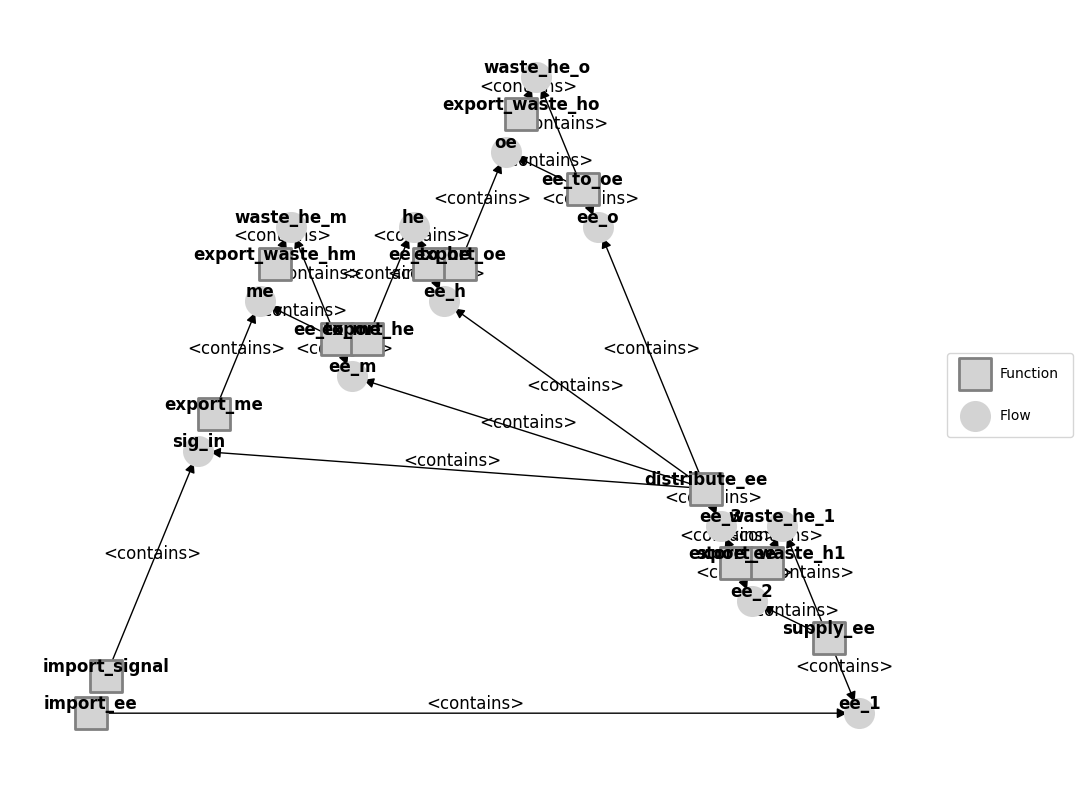

In [2]:
mdl= EPS()
mg = FunctionArchitectureGraph(mdl)
fig, ax = mg.draw()

As with dynamic models, in static models we use ``fp.run_one_fault`` to see the effects of single faults. All setup is performed in the Model class definition

In [3]:
result, mdlhist = propagate.one_fault(mdl, 'ee_to_me', 'toohigh_torque', desired_result="graph")

In this case, however, the output in ``mdlhists`` will be a single-dimensional dictionary (not something we can plot very well)

c:\users\dhulse\documents\github\fmdtools\fmdtools\analyze\history.py:716: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(times[0], times[-1])


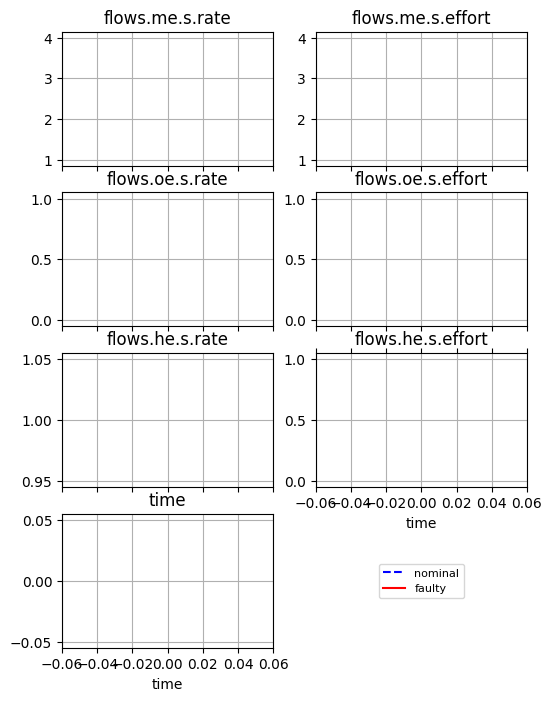

In [4]:
fig, ax = mdlhist.plot_line(*mdlhist.nominal.keys())

As a result, it's better to look at the results graph for a visualization of what went wrong. In this case ``resgraph`` better represents the fault propagation of the system than in a dynamic model, since there is only one time-step to represent (rather than a set)

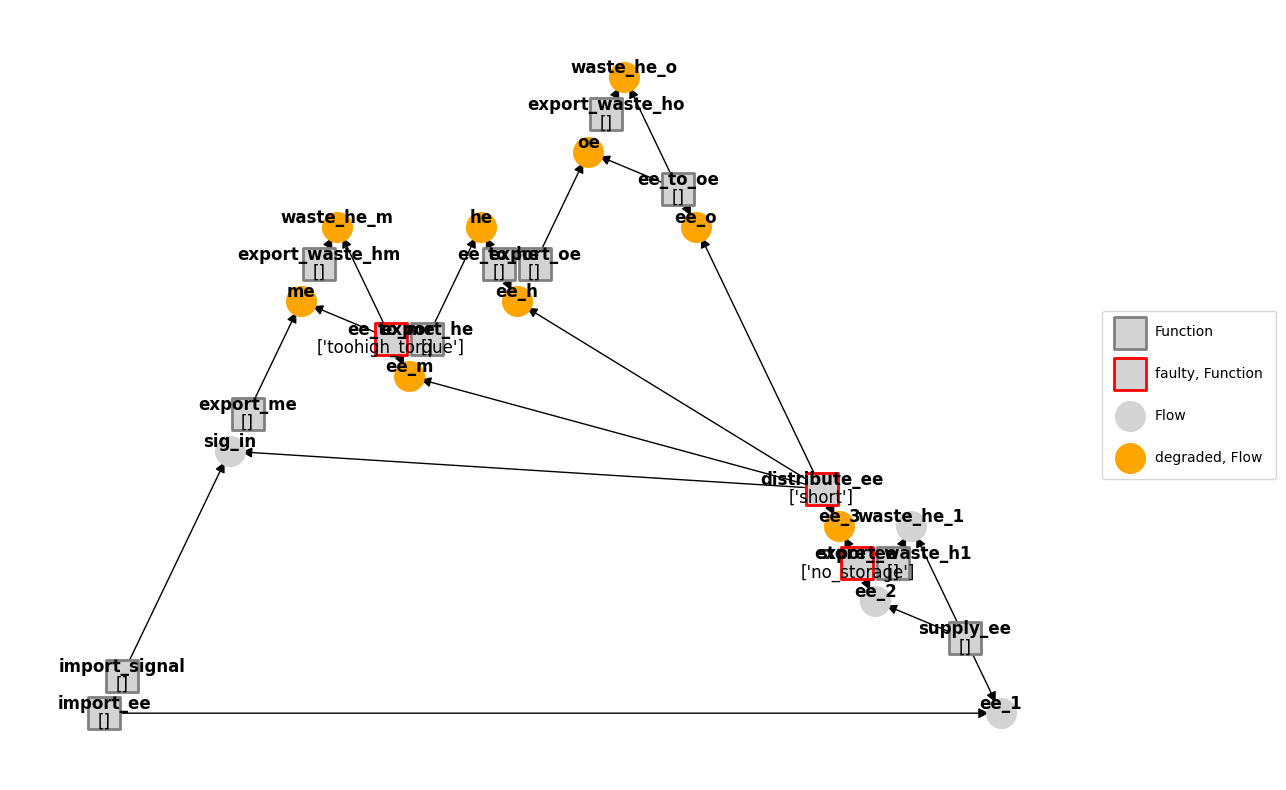

In [5]:
result.graph.set_edge_labels(title='')
fig, ax = result.graph.draw(figsize=(14,10))

We can run the set of single-fault scenarios on this model using ``fmdtools.sim.propagate.single_faults``. For single-fault scenarios, one does not need to use a ``SampleApproach``, since all faults are injected at a single time-step.

In [6]:
endclasses, mdlhists = propagate.single_faults(mdl, staged=True)

SCENARIOS COMPLETE:   0%|          | 0/35 [00:00<?, ?it/s]

SCENARIOS COMPLETE:  23%|██▎       | 8/35 [00:00<00:00, 72.73it/s]

SCENARIOS COMPLETE:  46%|████▌     | 16/35 [00:00<00:00, 75.14it/s]

SCENARIOS COMPLETE:  69%|██████▊   | 24/35 [00:00<00:00, 76.61it/s]

SCENARIOS COMPLETE:  91%|█████████▏| 32/35 [00:00<00:00, 77.32it/s]

SCENARIOS COMPLETE: 100%|██████████| 35/35 [00:00<00:00, 76.58it/s]

Using ``analyze.tabulate.result_summary_fmea``, one can see the degradation effects of this fault on the flows:

In [7]:
from fmdtools.analyze.tabulate import result_summary_fmea

In [8]:
tab = result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)
tab

degraded faulty      rate  \
import_signal_no_signal_t0p0                           []     []  0.000001   
ee_to_he_low_heat_t0p0                       ['me', 'oe']     []  0.000002   
ee_to_oe_optical_resist_t0p0                 ['me', 'he']     []       0.0   
ee_to_me_toohigh_torque_t0p0                           []     []   0.00005   
ee_to_he_toohigh_heat_t0p0                             []     []       0.0   
store_ee_low_storage_t0p0              ['me', 'oe', 'he']     []  0.000005   
export_he_hot_sink_t0p0                      ['me', 'oe']     []   0.00001   
supply_ee_adverse_resist_t0p0                          []     []  0.000002   
supply_ee_major_overload_t0p0          ['me', 'oe', 'he']     []  0.000003   
distribute_ee_adverse_resist_t0p0                      []     []   0.00001   
export_waste_h1_hot_sink_t0p0          ['me', 'oe', 'he']     []   0.00001   
export_waste_hm_ineffective_sink_t0p0  ['me', 'oe', 'he']     []  0.000005   
supply_ee_short_t0p0                                   []     []       0.0   
ee_to_me_open_circuit_t0p0                   ['oe', 'he']     []   0.00005   
supply_ee_open_circuit_t0p0                            []     []       0.0   
ee_to_he_high_heat_t0p0                      ['me', 'oe']     []       0.0   
ee_to_me_high_torque_t0p0                    ['oe', 'he']     []    0.0001   
import_ee_low_v_t0p0                                   []     []   0.00001   
ee_to_oe_burnt_out_t0p0                      ['me', 'he']     []  0.000002   
store_ee_no_storage_t0p0                               []     []  0.000005   
export_waste_h1_ineffective_sink_t0p0  ['me', 'oe', 'he']     []  0.000005   
export_waste_ho_ineffective_sink_t0p0  ['me', 'oe', 'he']     []  0.000005   
distribute_ee_poor_alloc_t0p0                          []     []   0.00002   
ee_to_me_low_torque_t0p0                               []     []    0.0001   
import_ee_no_v_t0p0                                    []     []   0.00001   
distribute_ee_open_circuit_t0p0                        []     []   0.00003   
export_he_ineffective_sink_t0p0              ['me', 'oe']     []  0.000005   
export_waste_ho_hot_sink_t0p0          ['me', 'oe', 'he']     []   0.00001   
import_ee_high_v_t0p0                  ['me', 'oe', 'he']     []  0.000005   
ee_to_me_short_t0p0                                    []     []   0.00005   
export_waste_hm_hot_sink_t0p0          ['me', 'oe', 'he']     []   0.00001   
nominal                                ['me', 'oe', 'he']     []       1.0   
import_signal_partial_signal_t0p0                      []     []   0.00001   
ee_to_he_open_circuit_t0p0                   ['me', 'oe']     []       0.0   
supply_ee_minor_overload_t0p0                          []     []   0.00001   
distribute_ee_short_t0p0                               []     []   0.00002   

                                         cost expected_cost  
import_signal_no_signal_t0p0           2000.0          87.6  
ee_to_he_low_heat_t0p0                  550.0         48.18  
ee_to_oe_optical_resist_t0p0            520.0        11.388  
ee_to_me_toohigh_torque_t0p0           5050.0       11059.5  
ee_to_he_toohigh_heat_t0p0             5100.0        111.69  
store_ee_low_storage_t0p0              2000.0         438.0  
export_he_hot_sink_t0p0                 600.0         262.8  
supply_ee_adverse_resist_t0p0          1650.0        144.54  
supply_ee_major_overload_t0p0          2600.0        341.64  
distribute_ee_adverse_resist_t0p0      2750.0        1204.5  
export_waste_h1_hot_sink_t0p0           500.0         219.0  
export_waste_hm_ineffective_sink_t0p0  1000.0         219.0  
supply_ee_short_t0p0                   5150.0        22.557  
ee_to_me_open_circuit_t0p0              650.0        1423.5  
supply_ee_open_circuit_t0p0            1450.0        3.1755  
ee_to_he_high_heat_t0p0                2500.0         10.95  
ee_to_me_high_torque_t0p0               450.0        1971.0  
import_ee_low_v_t0p0                    700.0 